# Convert to a different mass definition

In this notebook we show how to convert to a different NFW mass definition using ``profiley``

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings

import profiley
from profiley.nfw import NFW

profiley.__version__

'1.1.0b10'

Let's define a single mass with different concentrations, to see what the latter does to the mass conversion.

In [20]:
m = 2e14
c = np.linspace(2, 10, 8)
z = 0.5

In [21]:
nfw = NFW(m, c, z, overdensity=500, background='c')

Let's get some information on our object:

In [22]:
print(nfw)

NFW profile object containing 8 profiles. shape: (8,))
  overdensity: 500c
  log mass = 14.30
  concentration range = 2.00-10.00
  redshift = 0.50


We can use the ``mdelta`` method to obtain the mass given any overdensity definition:

In [23]:
m200m, c200m = nfw.mdelta(200, background='m')
m200m.shape, c200m.shape

((8,), (8,))

Text(0, 0.5, '$m_\\mathrm{200m}/m_\\mathrm{500c}$')

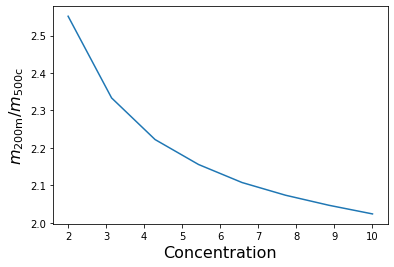

In [27]:
plt.plot(c, m200m/m)
plt.xlabel('Concentration', fontsize=16)
plt.ylabel('$m_\mathrm{200m}/m_\mathrm{500c}$', fontsize=16)

As shown above, ``mdelta`` returns both the mass and the concentration:

In [15]:
help(nfw.mdelta)

Help on method mdelta in module profiley.nfw:

mdelta(overdensity, background='c', err=0.001, n_guess_rng=1000, max_iter=50) method of profiley.nfw.NFW instance
    Calculate mass at any overdensity from the original mass
    definition
    
    Parameters
    ----------
    overdensity : float
        overdensity at which the mass should be calculated
    background : one of ('c','m'), optional
        background density as a reference for ``overdensity``.
        defining this object is implemented
    err: float, optional
        maximum error on ``delta_c`` that can be tolerated to claim
        convergence
    n_guess_rng : int, optional
        how many samples of ``c`` to obtain in each iteration. See
        Notes below.
    max_iter : int, optional
        maximum number of iterations
    
    Returns
    -------
    mdelta, cdelta : ndarray, shape ``self.c.shape``
        mass and concentrations calculated at the requested
        overdensity



The shapes of each output of ``mdelta`` are correspond to the shape produced by the product of ``m``, ``c``, and ``z``:

In [17]:
m = np.logspace(14, 15, 3)[:,None]
nfw = NFW(m, c, z, overdensity=500, background='c')
m200m, c200m = nfw.mdelta(200, background='m')
m200m.shape

(3, 8)

That's 3 mass elements and 8 concentration elements, as defined above.